In [20]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [21]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float,
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str,
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int,
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('data/kc_house_data.csv',dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])



/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [27]:
def polynomial_dataframe(data,degree):
    data_frame = pd.DataFrame()
    data_frame['X1'] = data.copy()
    for i in range(2,degree+1):
        data_frame['X'+str(i)] = data_frame['X'+str(i-1)]*data_frame['X1']
    return data_frame

In [28]:
poly15 = polynomial_dataframe(sales['sqft_living'],15)
poly15.head()



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [29]:
l2_small_penalty = 1.5e-5

In [30]:
ridge_model = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
ridge_model.fit(poly15,sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [31]:
print ridge_model.coef_

[  1.24873306e+02  -4.77376011e-02   3.01446238e-05  -2.44419942e-09
  -1.94153675e-13   8.54085686e-18   1.51142121e-21   8.27979094e-26
   6.52603100e-31  -3.27895017e-34  -3.87962315e-38  -2.72437650e-42
  -1.07790800e-46   3.78242694e-51   1.39790296e-54]


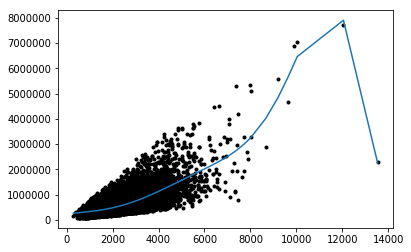

In [33]:
plt.plot(poly15['X1'],sales['price'],'k.',poly15['X1'],ridge_model.predict(poly15))

In [36]:
set1 = pd.read_csv('data/wk3_kc_house_set_1_data.csv')
set2 = pd.read_csv('data/wk3_kc_house_set_2_data.csv')
set3 = pd.read_csv('data/wk3_kc_house_set_3_data.csv')
set4 = pd.read_csv('data/wk3_kc_house_set_4_data.csv')

In [39]:
set1 = set1.sort(['sqft_living','price'])
set2 = set2.sort(['sqft_living','price'])
set3 = set3.sort(['sqft_living','price'])
set4 = set4.sort(['sqft_living','price'])

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [41]:
poly_set1 = polynomial_dataframe(set1['sqft_living'],15)
poly_set2 = polynomial_dataframe(set2['sqft_living'],15)
poly_set3 = polynomial_dataframe(set3['sqft_living'],15)
poly_set4 = polynomial_dataframe(set4['sqft_living'],15)

In [43]:
l2_small_penalty=1e-9
submodel1 = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
submodel2 = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
submodel3 = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
submodel4 = sk.linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
submodel1.fit(poly_set1,set1['price'])
submodel2.fit(poly_set2,set2['price'])
submodel3.fit(poly_set3,set3['price'])
submodel4.fit(poly_set4,set4['price'])


Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [44]:
print submodel1.coef_
print submodel2.coef_
print submodel3.coef_
print submodel4.coef_


[  6.23857718e+01   1.98235299e-02   7.56558420e-06  -5.91491377e-10
  -1.96217953e-14   1.86865173e-16  -6.62909386e-16   2.79625958e-16
  -1.81062210e-16  -1.24404650e-15   2.30366670e-16   5.06433875e-16
   2.25732230e-16  -3.14308031e-16  -3.32978688e-16]
[ -2.19894686e+02   1.69130364e-01  -2.27849601e-05   1.34431957e-09
  -1.20432513e-14   7.64003745e-16  -4.89141524e-16  -2.93941735e-16
  -6.17970420e-16   3.81800372e-16   5.15069439e-16   8.98788959e-16
   1.08009405e-15  -4.37750733e-16   1.40403443e-15]
[ -1.98970177e+02   1.57531730e-01  -2.04008046e-05   1.26203624e-09
  -1.59074526e-14  -2.70708681e-16  -4.55047514e-16   5.97386817e-16
   4.28518765e-16   5.27358368e-16  -4.79130198e-16   1.20138611e-15
   6.23420738e-16   3.65494169e-16  -3.00231269e-16]
[ -3.48248202e+01   7.33755964e-02  -5.31371126e-06   3.38536611e-10
   3.57683193e-14  -1.23385098e-15  -4.13869228e-16   8.99222180e-16
  -4.98668926e-16  -5.35366910e-16   2.49778932e-16   4.01979504e-16
   3.06323327

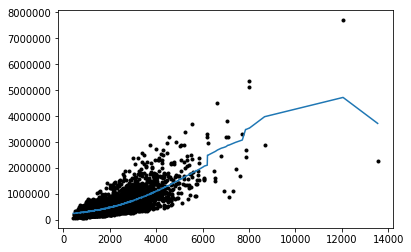

In [45]:
plt.plot(poly_set1['X1'],set1['price'],'k.',poly_set1['X1'],submodel1.predict(poly_set1))

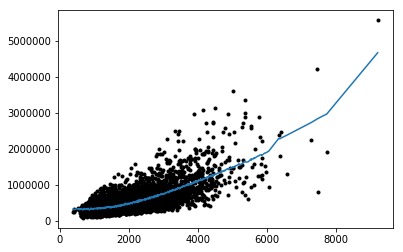

In [46]:
plt.plot(poly_set2['X1'],set2['price'],'k.',poly_set2['X1'],submodel2.predict(poly_set2))

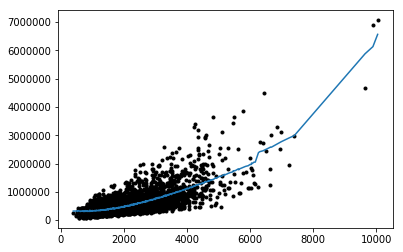

In [47]:
plt.plot(poly_set3['X1'],set3['price'],'k.',poly_set3['X1'],submodel3.predict(poly_set3))

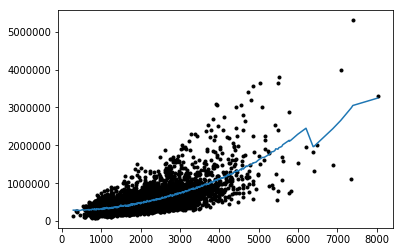

In [48]:
plt.plot(poly_set4['X1'],set4['price'],'k.',poly_set4['X1'],submodel4.predict(poly_set4))

In [ ]:
# Ridge regression using large penalty